# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/) and I will be using Machine Learning to predict whether any person is suffering from heart disease

In [ ]:
import numpy as np,math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 4 algorithms

    1.KNeighbors Classifier
    2.Decision Tree Classifier
    3.Gaussian Naive Bayes Classifier
    4.Support Vector Machine Classifier
    5.Random Forest Classifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics as mt

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1oowUt3c-HB5QItzbNjbeZGgTxjcD0snQ/view'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('heart.csv')


In [ ]:
df = pd.read_csv('heart.csv')
df = df.sample(frac=1)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
749,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
389,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
865,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
400,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
842,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 749 to 386
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 120.1 KB


# Details Of DataSet

1.  age - age in years
2.  sex - (1 = male; 0 = female)
3.  cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
4.  trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5.  chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
6.  fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
7.  restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
8.  thalach - maximum heart rate achieved
9.  exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
13. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()["target"].abs().sort_values(ascending=False)

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64

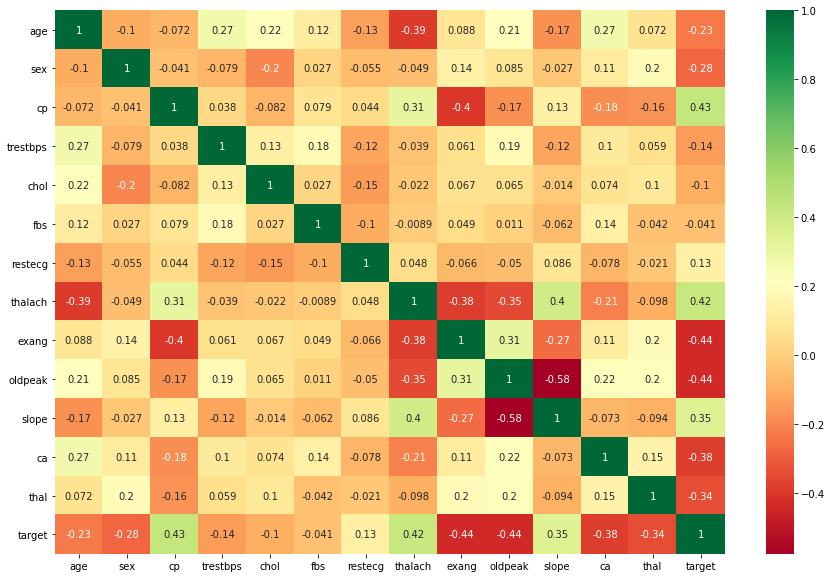

In [ ]:
correlation_matrix=df.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(15,10))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
correlation_matrix=df.corr()
columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
columns[-1]=True
selected_columns = df.columns[columns]
df = df[selected_columns]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
749,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
389,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
865,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
400,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
842,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa9529b630>,
      dtype=object)

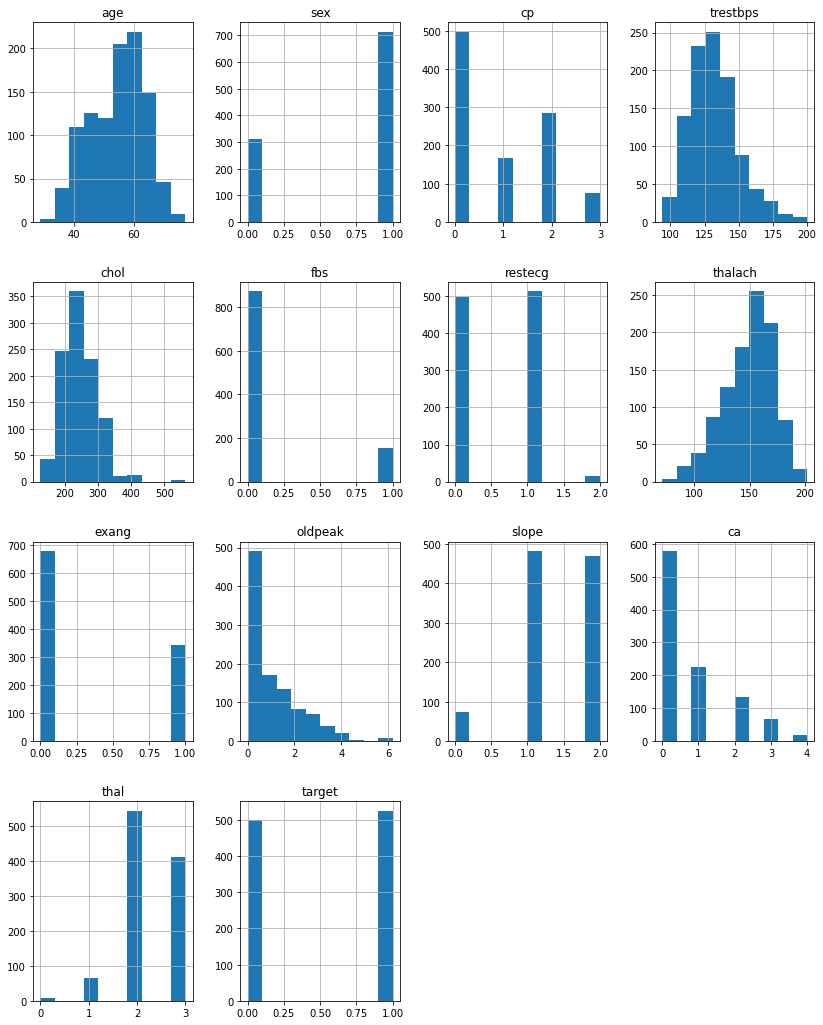

In [ ]:
df.hist(figsize=(14,18))

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

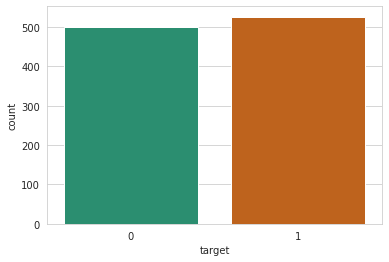

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='Dark2')

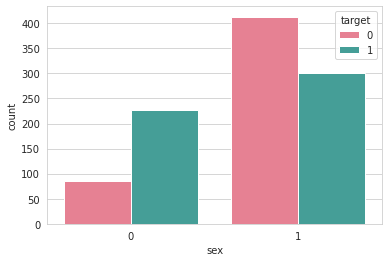

In [ ]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

In [ ]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,86,226
1,413,300


# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [ ]:
final_dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [ ]:
standardScaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
final_dataset[columns_to_scale]=standardScaler.fit_transform(final_dataset[columns_to_scale])

In [ ]:
final_dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
749,0.393241,-0.377636,-0.504195,-0.222407,-0.571753,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
389,0.944639,0.764688,-0.252098,0.038525,1.045985,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
865,0.613800,1.050269,-0.116353,0.951787,-0.146032,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
400,-0.599275,-0.663216,-1.124743,-0.439851,0.790552,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
842,0.393241,-1.120146,-0.310274,0.690855,1.216273,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1


# Test-Train Spliting

In [ ]:
# Y=final_dataset["target"]
# X=final_dataset.drop(["target"],axis=1)

In [ ]:
predictors=final_dataset.drop("target",axis=1)
target=final_dataset["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.25,random_state=14)

# Y_train=final_dataset['target'][:1000]
# X_train=final_dataset.drop(['target'],axis=1)
# X_test=X_train[1000:]
# X_train=X_train[:1000]
# Y_test=final_dataset['target'][1000:]

In [ ]:
X_train.shape

(768, 30)

In [ ]:
Y_train.shape

(768,)

In [ ]:
X_test.shape

(257, 30)

In [ ]:
Y_test.shape

(257,)

# KNeighbors Classifier

In [ ]:
def print_prediction(K,tp):
    clf=KNeighborsClassifier(K,'uniform')
    clf.fit(X_train,Y_train)
    prediction=clf.predict(X_test)
    if tp==False:
        return mt.accuracy_score(Y_test,prediction,normalize=True)
    else:
        print("Predictions\n")
        print(prediction)

        print("\nAccuracy with normalize = ",mt.accuracy_score(Y_test,prediction,normalize=True))
        print(mt.classification_report(Y_test,prediction))
        print(mt.confusion_matrix(Y_test,prediction))

K value :-  17
Accuracy :-  0.8949416342412452


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

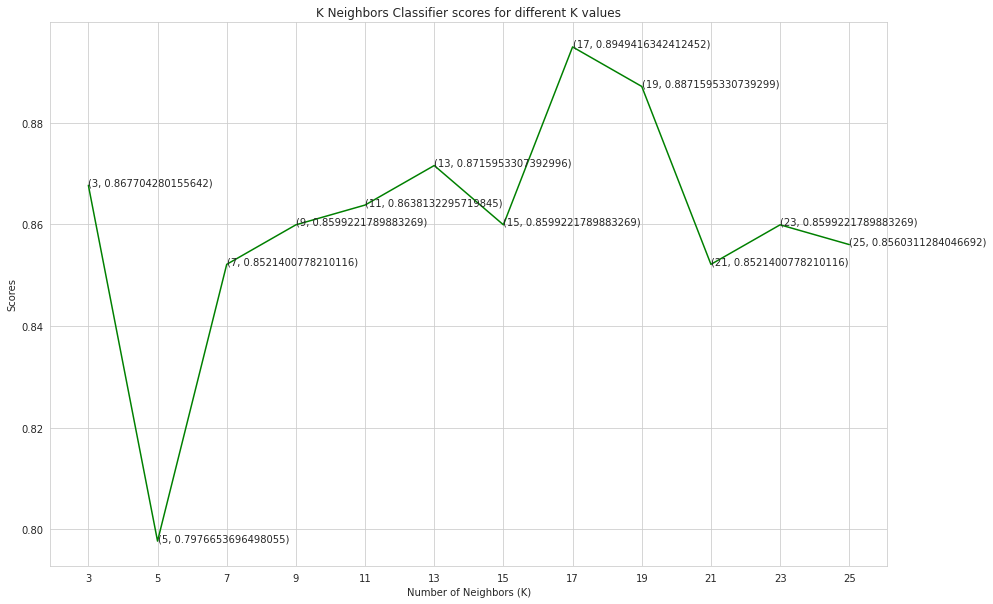

In [ ]:
plt.figure(figsize=(15,10))
knn_value=[]
knn_score=[]
for i in range(3,int(math.sqrt(len(X_train))),2):
    a=print_prediction(i,False)
    knn_score.append(a)
    knn_value.append(i)

plt.plot([k for k in range(3,int(math.sqrt(len(X_train))),2)],knn_score,color='green')
j=0
for i in range(3,int(math.sqrt(len(X_train))),2):
    plt.text(i,knn_score[j],(i,knn_score[j]))
    j+=1

print("K value :- ",end=" ")
print(knn_value[knn_score.index(max(knn_score))])
print("Accuracy :- ",end=" ")
print(max(knn_score))

plt.xticks([i for i in range(3,int(math.sqrt(len(X_train))),2)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier=KNeighborsClassifier()
parameters={'n_neighbors' : (3,23,1),
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_kn=GridSearchCV(estimator = knn_classifier,
                     param_grid = parameters,
                     scoring = 'accuracy',
                     cv = 10,
                     verbose = 1,
                     n_jobs = -1).fit(X_train,Y_train)

print(grid_kn.best_estimator_)
print(grid_kn.best_params_)
print(grid_kn.score(X_test,Y_test))

print(grid_kn.score(X_train,Y_train))

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='distance')
{'algorithm': 'auto', 'n_neighbors': 23, 'weights': 'distance'}
0.9844357976653697
1.0


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.1s finished


In [ ]:
compare=[]
compare.append(['KNeighbors',grid_kn.score(X_train,Y_train),grid_kn.score(X_test,Y_test)])

# Decision Tree Classifier

In [ ]:
params = {
        'max_leaf_nodes': list(range(2, 50)),
        'min_samples_split': [2, 3, 4]}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    params,
                    verbose=1,
                    cv=10).fit(X_train,Y_train)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)
# print(grid.predict(X_test))
print(mt.accuracy_score(Y_test,grid_dt.predict(X_test),normalize=True))
# print(grid.predict(X_test))
print(mt.accuracy_score(Y_train,grid_dt.predict(X_train),normalize=True))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'max_leaf_nodes': 48, 'min_samples_split': 2}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=48,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
0.9727626459143969
0.9986979166666666


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:    7.6s finished


In [ ]:
compare.append(['DecisionTree', mt.accuracy_score(Y_train,grid_dt.predict(X_train),normalize=True),mt.accuracy_score(Y_test,grid_dt.predict(X_test),normalize=True)] )

# Gaussian Naive Bayes Classifier

In [ ]:
def print_predict(classify,X_test):
    prediction=classify.predict(X_test)
#     print("Predictions\n")
#     print(prediction)
    print("\nAccuracy with normalize = ",mt.accuracy_score(Y_test,prediction,normalize=True))
    print(mt.classification_report(Y_test,prediction))
    print(mt.confusion_matrix(Y_test,prediction))
    return mt.accuracy_score(Y_test,prediction,normalize=True)

def gaussian(X_train,Y_train,X_test):
    classify=GaussianNB() # for gaussian
    classify.fit(X_train,Y_train)

    return print_predict(classify,X_test)

In [ ]:
accuracy=gaussian(X_train,Y_train,X_test)


Accuracy with normalize =  0.8404669260700389
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       135
           1       0.79      0.90      0.84       122

    accuracy                           0.84       257
   macro avg       0.84      0.84      0.84       257
weighted avg       0.85      0.84      0.84       257

[[106  29]
 [ 12 110]]


In [ ]:
clf=GaussianNB().fit(X_train,Y_train)
compare.append(['Gaussian_NaiveBayes',mt.accuracy_score(Y_train,clf.predict(X_train),normalize=True),accuracy])

# Support Vector Machine Classifier

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear']}

grid_sv = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3).fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.831, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.851, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.883, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.817, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.876, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.831, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   16.1s finished


In [ ]:
print(grid_sv.best_params_)
print(grid_sv.best_estimator_)
print(mt.accuracy_score(Y_test,grid_sv.predict(X_test),normalize=True))
print(mt.accuracy_score(Y_train,grid_sv.predict(X_train),normalize=True))

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.867704280155642
0.8893229166666666


In [ ]:
compare.append(['Support_Vector_Machine',mt.accuracy_score(Y_train,grid_sv.predict(X_train),normalize=True),mt.accuracy_score(Y_test,grid_sv.predict(X_test),normalize=True)])

# Random Forest

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [250,450],
    'max_features': ['auto', 'sqrt','log2'],
    'max_depth' : [4,5,6,7,8,9,10,11,12],
    'criterion' :['gini','entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10).fit(X_train,Y_train)

print(CV_rfc.best_params_)
print(CV_rfc.best_estimator_)
print(mt.accuracy_score(Y_test,CV_rfc.predict(X_test),normalize=True))
print(mt.accuracy_score(Y_train,CV_rfc.predict(X_train),normalize=True))

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 250}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
0.9883268482490273
0.9986979166666666


In [ ]:
compare.append(['Random_Forest',mt.accuracy_score(Y_train,CV_rfc.predict(X_train),normalize=True),mt.accuracy_score(Y_test,CV_rfc.predict(X_test),normalize=True)])

# Comparision

In [ ]:
a=[]
b=[]
c=[]
for x in range(len(compare)):
    a.append(compare[x][0])
    b.append(compare[x][1])
    c.append(compare[x][2])
df=pd.DataFrame(columns=["algorithms","train","test"], data=[[a[x],b[x]*100,c[x]*100] for x in range(len(compare))])
df

,algorithms,train,test
0,KNeighbors,100.000000,98.443580
1,DecisionTree,99.869792,97.276265
2,Gaussian_NaiveBayes,84.244792,84.046693
3,Support_Vector_Machine,88.932292,86.770428
4,Random_Forest,99.869792,98.832685


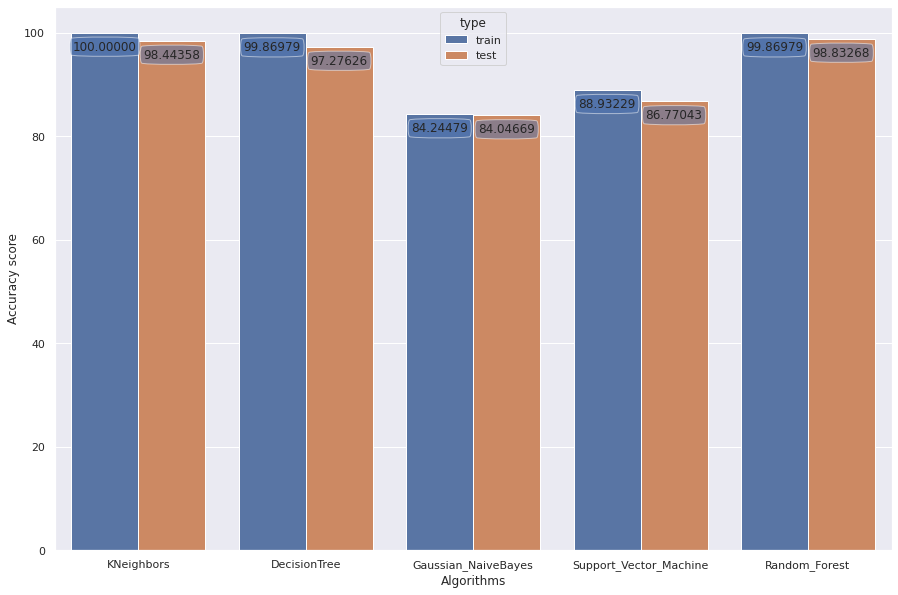

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

df = pd.melt(df, id_vars="algorithms", var_name="type", value_name="rate")
splot = sns.barplot(x="algorithms", y="rate", hue="type", data=df)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

for p in splot.patches:
    splot.annotate(format(p.get_height(),'.5f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,-14),textcoords='offset points',bbox=dict(boxstyle="round4", alpha=0.5),)

# It is observed that  Random Forest is more acurate than the rest algorithms for this perticular dataset.